In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")



In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=df.iloc[:,:8]
X

In [6]:
X=df.drop("Outcome",axis=1).values
y=df['Outcome'].values


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
import torch
X_train=torch.FloatTensor(X_train)



In [9]:
y_train=torch.LongTensor(y_train)


In [10]:
X_test=torch.FloatTensor(X_test)
y_test=torch.LongTensor(y_test)

In [33]:
import torch.nn as nn
import torch.utils as utils

import torch.optim as optim
import torch.nn.functional as F

In [103]:
class NeuralNet(nn.Module):
    def __init__(self,inp,out):
        super(NeuralNet,self).__init__()
        self.layer1=nn.Linear(inp,20)
        self.layer2=nn.Linear(20,20)
        self.layer3=nn.Linear(20,out)
        
    def forward(self,x):
        o=F.relu(self.layer1(x))
        o=F.relu(self.layer2(o))
        o=self.layer3(o)
        return o
        

In [104]:
model=NeuralNet(8,2)
torch.manual_seed(20)

In [105]:
model

NeuralNet(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=2, bias=True)
)

In [106]:
#building the training loop
optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()
epochs=100
losses=[]

for epoch in range(epochs):
    output=model.forward(X_train)
    loss=loss_fn(output,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(epoch,loss)

0 tensor(3.4367, grad_fn=<NllLossBackward0>)
1 tensor(3.1492, grad_fn=<NllLossBackward0>)
2 tensor(2.8731, grad_fn=<NllLossBackward0>)
3 tensor(2.6159, grad_fn=<NllLossBackward0>)
4 tensor(2.3807, grad_fn=<NllLossBackward0>)
5 tensor(2.1681, grad_fn=<NllLossBackward0>)
6 tensor(1.9781, grad_fn=<NllLossBackward0>)
7 tensor(1.8114, grad_fn=<NllLossBackward0>)
8 tensor(1.6685, grad_fn=<NllLossBackward0>)
9 tensor(1.5482, grad_fn=<NllLossBackward0>)
10 tensor(1.4487, grad_fn=<NllLossBackward0>)
11 tensor(1.3662, grad_fn=<NllLossBackward0>)
12 tensor(1.2938, grad_fn=<NllLossBackward0>)
13 tensor(1.2249, grad_fn=<NllLossBackward0>)
14 tensor(1.1541, grad_fn=<NllLossBackward0>)
15 tensor(1.0793, grad_fn=<NllLossBackward0>)
16 tensor(1.0030, grad_fn=<NllLossBackward0>)
17 tensor(0.9312, grad_fn=<NllLossBackward0>)
18 tensor(0.8723, grad_fn=<NllLossBackward0>)
19 tensor(0.8339, grad_fn=<NllLossBackward0>)
20 tensor(0.8181, grad_fn=<NllLossBackward0>)
21 tensor(0.8182, grad_fn=<NllLossBackward0>

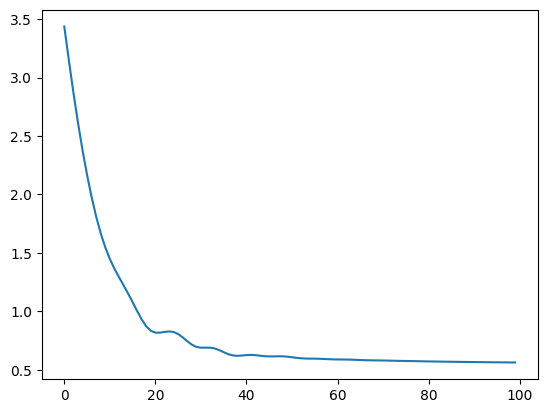

In [107]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses)

In [108]:
predictions=[]
for i,data in enumerate(X_test):
    pred=model(data)
    pred=pred.argmax().item()
    predictions.append(pred)

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [112]:
Acc=accuracy_score(y_test,predictions)
Acc

0.7077922077922078

In [114]:
cm=confusion_matrix(y_test,predictions)
cm

array([[81, 18],
       [27, 28]])

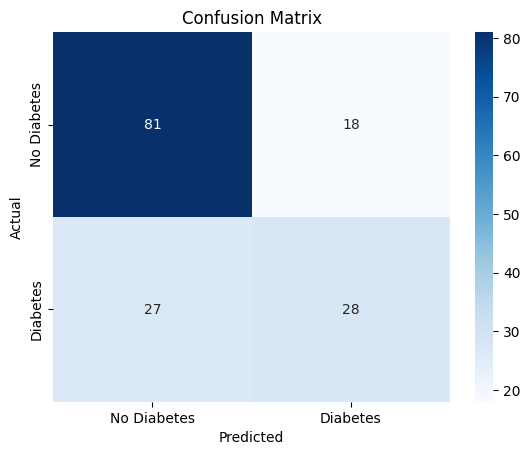

In [118]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [120]:
#improved version

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Re-define your model class if necessary
class NeuralNet(nn.Module):
    def __init__(self, inp, out):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(inp, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, out)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Convert data to numpy array for stratification
X = df.drop("Outcome", axis=1).values
y = df['Outcome'].values

fold_accuracies = []  # To store accuracies of each fold

# Perform cross-validation
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f'Fold {fold + 1}')
    
    # Split the data into train and validation sets
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_val_fold = scaler.transform(X_val_fold)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_fold)
    y_train_tensor = torch.LongTensor(y_train_fold)
    X_val_tensor = torch.FloatTensor(X_val_fold)
    y_val_tensor = torch.LongTensor(y_val_fold)

    # Initialize the model
    model = NeuralNet(8, 2)
    
    # Define optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    # Training loop
    epochs = 100
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        output = model(X_train_tensor)  # Forward pass
        loss = loss_fn(output, y_train_tensor)  # Compute loss
        
        optimizer.zero_grad()  # Zero gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        # Optional: print progress every few epochs
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

    # Evaluation on validation fold
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculations for inference
        val_outputs = model(X_val_tensor)
        _, val_predictions = torch.max(val_outputs, 1)
    
    # Compute accuracy for this fold
    accuracy = accuracy_score(y_val_tensor, val_predictions)
    fold_accuracies.append(accuracy)
    print(f'Accuracy for Fold {fold + 1}: {accuracy * 100:.2f}%')

# Calculate and print average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy across all folds: {average_accuracy * 100:.2f}%')


Fold 1
Epoch 20, Loss: 0.56361985206604
Epoch 40, Loss: 0.48214760422706604
Epoch 60, Loss: 0.44416770339012146
Epoch 80, Loss: 0.4244273006916046
Epoch 100, Loss: 0.40952372550964355
Accuracy for Fold 1: 75.97%
Fold 2
Epoch 20, Loss: 0.573508620262146
Epoch 40, Loss: 0.4967128038406372
Epoch 60, Loss: 0.4610421359539032
Epoch 80, Loss: 0.4424384832382202
Epoch 100, Loss: 0.42638951539993286
Accuracy for Fold 2: 80.52%
Fold 3
Epoch 20, Loss: 0.5797098875045776
Epoch 40, Loss: 0.47879892587661743
Epoch 60, Loss: 0.44658932089805603
Epoch 80, Loss: 0.42773810029029846
Epoch 100, Loss: 0.411434143781662
Accuracy for Fold 3: 77.92%
Fold 4
Epoch 20, Loss: 0.5804495215415955
Epoch 40, Loss: 0.4855530858039856
Epoch 60, Loss: 0.4428679049015045
Epoch 80, Loss: 0.42635875940322876
Epoch 100, Loss: 0.4135769307613373
Accuracy for Fold 4: 72.55%
Fold 5
Epoch 20, Loss: 0.5631462931632996
Epoch 40, Loss: 0.4793356657028198
Epoch 60, Loss: 0.44602447748184204
Epoch 80, Loss: 0.4281010329723358
Epoc